In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data_path = '..\..\#DATA\Mobile_Price_Prediction\mobile_price_data.csv'
df = pd.read_csv(data_path)
df.head()

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,"Realme Narzo 10A (So White, 32 GB)","₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,"Realme Narzo 10A (So Blue, 32 GB)","₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,"Realme Narzo 10A (So Blue, 64 GB)","₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
3,"Realme Narzo 10A (So White, 64 GB)","₹9,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
4,"Realme Narzo 10 (That Green, 128 GB)","₹11,999",That Green,Dual Sim,16.51 cm (6.5 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,128 GB,4 GB,48MP + 8MP + 2MP + 2MP,16MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75.4 mm,164.4 mm,9 mm,199 g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   mobile_name    459 non-null    object
 1   mobile_price   459 non-null    object
 2   mobile_color   459 non-null    object
 3   dual_sim       459 non-null    object
 4   disp_size      459 non-null    object
 5   resolution     459 non-null    object
 6   os             459 non-null    object
 7   num_cores      459 non-null    object
 8   mp_speed       459 non-null    object
 9   int_memory     459 non-null    object
 10  ram            459 non-null    object
 11  p_cam          459 non-null    object
 12  f_cam          459 non-null    object
 13  network        459 non-null    object
 14  bluetooth      459 non-null    object
 15  battery_power  459 non-null    object
 16  mob_width      459 non-null    object
 17  mob_height     459 non-null    object
 18  mob_depth      459 non-null   

In [5]:
for idx, column_name in enumerate(df.columns):
    print(idx, ":", column_name, "\n")
    print(df[column_name].value_counts())

0 : mobile_name 

mobile_name
Vivo Z1Pro (Sonic Black, 64 GB)           4
Vivo U10 (Thunder Black, 64 GB)           4
Vivo U10 (Electric Blue, 64 GB)           3
Mi A2 (Red, 64 GB)                        3
Redmi Note 5 Pro (Black, 64 GB)           3
                                         ..
Redmi K20 (Flame Red, 64 GB)              1
Redmi Note 7 (Sapphire Blue, 32 GB)       1
Redmi Y3 (Prime Black, 32 GB)             1
Redmi Y3 (Elegant Blue, 32 GB)            1
OPPO Reno 10x Zoom (Jet Black, 128 GB)    1
Name: count, Length: 363, dtype: int64
1 : mobile_price 

mobile_price
₹11,999    19
₹13,999    18
₹16,999    17
₹9,999     17
₹13,990    14
           ..
₹11,982     1
₹9,900      1
₹11,599     1
₹8,689      1
₹15,000     1
Name: count, Length: 139, dtype: int64
2 : mobile_color 

mobile_color
Black              28
Red                20
Gold               19
Blue               14
Rose Gold          10
                   ..
Emerald Green       1
Forest Green        1
Charcoal Blue 

## Data preparation

In [6]:
for idx, value in enumerate(df['mobile_name']):
    df['mobile_name'][idx] = value.split(" (")[0] # ['Realme Narzo 10A', 'So White, 32 GB)']

df.head(3)

,mobile_name,mobile_price,mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,Realme Narzo 10A,"₹8,999",So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,Realme Narzo 10A,"₹8,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,Realme Narzo 10A,"₹9,999",So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


### I. The columns then contien a numbers and string
Like: mobile_price, disp_size, resolution, mp_speed, int_memory, ram, battery_power, mob_width, mob_height, mob_depth, mob_weight

##### mobile_price column

In [7]:
symbol = df['mobile_price'][0][0] # ₹: Symbole de la roupie indienne

for idx, value in enumerate(df['mobile_price']):
    df['mobile_price'][idx] = float(value[1:].replace(",", ""))


df['mobile_price'] = df['mobile_price'].astype(float)
df.rename(columns={'mobile_price': "mobile_price(" + str(symbol) + ")"}, inplace=True)
df.head(2)

,mobile_name,mobile_price(₹),mobile_color,dual_sim,disp_size,resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,Realme Narzo 10A,8999.0,So White,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,Realme Narzo 10A,8999.0,So Blue,Dual Sim,16.56 cm (6.52 inch),1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


#### Disp Size column

In [8]:
df.insert(df.columns.get_loc('disp_size')+1, column="disp_size(inch)", value=0)

for idx, value in enumerate(df['disp_size']):
    splited_value = value.split(" ") # Exemples ['16.56', 'cm', '(6.52', 'inch)']

    # print(float(splited_value[0]), float(splited_value[2][1:]))

    df.loc[idx, 'disp_size'] = float(splited_value[0])
    df.loc[idx, 'disp_size(inch)']  = float(splited_value[2][1:])

df.rename(columns={'disp_size': "disp_size(cm)"}, inplace=True)
df[['disp_size(cm)', 'disp_size(inch)']] = df[['disp_size(cm)', 'disp_size(inch)']].astype(float)

df.head(3)

,mobile_name,mobile_price(₹),mobile_color,dual_sim,disp_size(cm),disp_size(inch),resolution,os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,Realme Narzo 10A,8999.0,So White,Dual Sim,16.56,6.52,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,Realme Narzo 10A,8999.0,So Blue,Dual Sim,16.56,6.52,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,Realme Narzo 10A,9999.0,So Blue,Dual Sim,16.56,6.52,1600 x 720 Pixels,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


#### Resolution column

In [9]:
df.insert(df.columns.get_loc('resolution')+1, column="resolution_horizontally(px)", value=0)


for idx, value in enumerate(df['resolution']):
    splited_value = value.split(" ") # Exemple ['1800', 'x', '720', 'Pixels']

    # print(float(splited_value[0]), float(splited_value[2][1:]))
     
    df.loc[idx, 'resolution_horizontally(px)'] = int(splited_value[0])
    df.loc[idx, 'resolution'] = int(splited_value[2])

df.rename(columns={'resolution': "resolution_vertically(px)"}, inplace=True)
df[['resolution_horizontally(px)', 'resolution_vertically(px)']] = df[['resolution_horizontally(px)', 'resolution_vertically(px)']].astype(int)
df.head(3)

,mobile_name,mobile_price(₹),mobile_color,dual_sim,disp_size(cm),disp_size(inch),resolution_vertically(px),resolution_horizontally(px),os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam,network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,Realme Narzo 10A,8999.0,So White,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,Realme Narzo 10A,8999.0,So Blue,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,Realme Narzo 10A,9999.0,So Blue,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5MP Front Camera,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


#### Front Camera column

In [10]:
df['f_cam'].value_counts()

f_cam
16MP Front Camera               112
8MP Front Camera                 65
20MP Front Camera                61
5MP Front Camera                 54
32MP Front Camera                53
13MP Front Camera                45
20MP + 2MP Dual Front Camera     16
32MP + 8MP Dual Front Camera     13
25MP Front Camera                13
24MP Front Camera                 7
16MP + 8MP Dual Front Camera      6
8MP Dual Front Camera             6
13MP + 2MP Dual Front Camera      3
44MP + 2MP Dual Front Camera      3
2MP Front Camera                  2
Name: count, dtype: int64

In [11]:
df.insert(df.columns.get_loc('f_cam')+1, column="f_cam_2(MP)", value=0)

for idx, value in enumerate(df["f_cam"]):
     
    val = value.replace("MP", "").replace("Dual Front Camera", "").replace("Front Camera", "").strip().split(" + ")
    if len(val) == 2:
        df.loc[idx, "f_cam"], df.loc[idx, "f_cam_2(MP)"]  = val[0], val[1]
    elif len(val) == 1:
        df.loc[idx, "f_cam"], df.loc[idx, "f_cam_2(MP)"]  = val[0], 0

df.rename(columns={"f_cam": "f_cam_1(MP)"}, inplace=True)
df[['f_cam_1(MP)', 'f_cam_2(MP)']] = df[['f_cam_1(MP)', 'f_cam_2(MP)']].astype(int) 

df.head(3)

,mobile_name,mobile_price(₹),mobile_color,dual_sim,disp_size(cm),disp_size(inch),resolution_vertically(px),resolution_horizontally(px),os,num_cores,mp_speed,int_memory,ram,p_cam,f_cam_1(MP),f_cam_2(MP),network,bluetooth,battery_power,mob_width,mob_height,mob_depth,mob_weight
0,Realme Narzo 10A,8999.0,So White,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5,0,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
1,Realme Narzo 10A,8999.0,So Blue,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2 GHz,32 GB,3 GB,12MP + 2MP + 2MP,5,0,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g
2,Realme Narzo 10A,9999.0,So Blue,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2 GHz,64 GB,4 GB,12MP + 2MP + 2MP,5,0,"4G VOLTE, 4G, 3G, 2G",Yes,5000 mAh,75 mm,164.4 mm,8.95 mm,195 g


#### "mp_speed", "int_memory", "ram", "battery_power", "mob_width", "mob_height", "mob_depth", "mob_weight" columns

In [12]:
columns = ["mp_speed", "int_memory", "ram", "battery_power", "mob_width", "mob_height", "mob_depth", "mob_weight"]

for column in columns:
    symbol = df[column][0].split(" ")[1]
    print(symbol)

    for idx, value in enumerate(df[column]):
        df.loc[idx, column] = float(value.split(" ")[0])

    df[column] = df[column].astype(float)
    df.rename(columns={column: column+"("+symbol+")"}, inplace=True)
    
df.head(3)

GHz
GB
GB
mAh
mm
mm
mm
g


,mobile_name,mobile_price(₹),mobile_color,dual_sim,disp_size(cm),disp_size(inch),resolution_vertically(px),resolution_horizontally(px),os,num_cores,mp_speed(GHz),int_memory(GB),ram(GB),p_cam,f_cam_1(MP),f_cam_2(MP),network,bluetooth,battery_power(mAh),mob_width(mm),mob_height(mm),mob_depth(mm),mob_weight(g)
0,Realme Narzo 10A,8999.0,So White,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2.0,32.0,3.0,12MP + 2MP + 2MP,5,0,"4G VOLTE, 4G, 3G, 2G",Yes,5000.0,75.0,164.4,8.95,195.0
1,Realme Narzo 10A,8999.0,So Blue,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2.0,32.0,3.0,12MP + 2MP + 2MP,5,0,"4G VOLTE, 4G, 3G, 2G",Yes,5000.0,75.0,164.4,8.95,195.0
2,Realme Narzo 10A,9999.0,So Blue,Dual Sim,16.56,6.52,720,1600,Android 10,Octa Core,2.0,64.0,4.0,12MP + 2MP + 2MP,5,0,"4G VOLTE, 4G, 3G, 2G",Yes,5000.0,75.0,164.4,8.95,195.0


### bluetooth column

In [13]:
df['bluetooth'].replace({"Yes": 1, "No":0}, inplace=True) # 1 for Yes - 0 for No
df['bluetooth'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 459 entries, 0 to 458
Series name: bluetooth
Non-Null Count  Dtype
--------------  -----
459 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


### Dual sim column

In [14]:
# df['dual_sim'].value_counts()
df['dual_sim'].replace({'Dual Sim': 1, "Single Sim":0}, inplace=True)
df['dual_sim'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 459 entries, 0 to 458
Series name: dual_sim
Non-Null Count  Dtype
--------------  -----
459 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


### Number of cores column

In [15]:
# df['num_cores'].value_counts()
df['num_cores'].replace({'Octa Core': 8, "Quad Core":4, "Single Core":1}, inplace=True)
df['num_cores'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 459 entries, 0 to 458
Series name: num_cores
Non-Null Count  Dtype
--------------  -----
459 non-null    int64
dtypes: int64(1)
memory usage: 3.7 KB


### Network Column

In [16]:
df['network'].value_counts()

network
3G, 4G VOLTE, 4G, 2G        139
3G, 4G VOLTE, 2G             85
4G VOLTE, 4G, 3G, 2G         79
3G, 4G, 2G                   39
4G, 3G, 2G                   26
4G VOLTE, 4G, 2G, 3G         20
4G VOLTE, 3G, 2G             14
3G, 4G VOLTE, 4G             13
4G VOLTE, 3G                 10
4G VOLTE                      8
3G, 4G VOLTE                  8
4G VOLTE, 5G                  4
5G, 4G VOLTE, 4G, 3G, 2G      3
4G, 2G, 3G                    3
4G VOLTE, 4G                  3
2G                            2
3G, 4G                        2
3G                            1
Name: count, dtype: int64

In [17]:
networks = ["network_2G", "network_3G", "network_4G", "network_4G VOLTE", "network_5G"]
df[networks] = 0
# df.insert(df.columns.get_loc('f_cam')+1, column="f_cam_2(MP)", value=0)

In [18]:
for network in ["2G", "3G", "4G", "4G VOLTE", "5G"]:
    for idx, value in enumerate(df["network"]):
        for i in  value.split(","):
            if network == i.strip():
                df.loc[idx, "network_"+network] = 1

In [19]:
df.drop(columns=['network'], inplace=True)

### OS Column

In [20]:
one_hot_encoded = pd.get_dummies(df['os'], prefix='os', dtype=int)

df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(columns=["os"], inplace=True)

df.head()

,mobile_name,mobile_price(₹),mobile_color,dual_sim,disp_size(cm),disp_size(inch),resolution_vertically(px),resolution_horizontally(px),num_cores,mp_speed(GHz),int_memory(GB),ram(GB),p_cam,f_cam_1(MP),f_cam_2(MP),bluetooth,battery_power(mAh),mob_width(mm),mob_height(mm),mob_depth(mm),mob_weight(g),network_2G,network_3G,network_4G,network_4G VOLTE,network_5G,os_Android 10,os_Android KitKat 4.4.2,os_Android Lollipop 5.1,os_Android Lollipop 5.1.1,os_Android Lollipop 5.4.1,os_Android Marshmallow 6,os_Android Marshmallow 6.0.1,os_Android Nougat 7,os_Android Nougat 7.1,os_Android Nougat 7.1.1,os_Android Nougat 7.1.2,os_Android Oreo 8,os_Android Oreo 8.1,os_Android Pie 10,os_Android Pie 9
0,Realme Narzo 10A,8999.0,So White,1,16.56,6.52,720,1600,8,2.0,32.0,3.0,12MP + 2MP + 2MP,5,0,1,5000.0,75.0,164.4,8.95,195.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Realme Narzo 10A,8999.0,So Blue,1,16.56,6.52,720,1600,8,2.0,32.0,3.0,12MP + 2MP + 2MP,5,0,1,5000.0,75.0,164.4,8.95,195.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Realme Narzo 10A,9999.0,So Blue,1,16.56,6.52,720,1600,8,2.0,64.0,4.0,12MP + 2MP + 2MP,5,0,1,5000.0,75.0,164.4,8.95,195.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Realme Narzo 10A,9999.0,So White,1,16.56,6.52,720,1600,8,2.0,64.0,4.0,12MP + 2MP + 2MP,5,0,1,5000.0,75.0,164.4,8.95,195.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Realme Narzo 10,11999.0,That Green,1,16.51,6.50,720,1600,8,2.0,128.0,4.0,48MP + 8MP + 2MP + 2MP,16,0,1,5000.0,75.4,164.4,9.00,199.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
one_hot_encoded = pd.get_dummies(df['p_cam'], prefix='p_cam', dtype=int)

df = pd.concat([df, one_hot_encoded], axis=1)
df.drop(columns=["p_cam"], inplace=True)

df.head(3)

,mobile_name,mobile_price(₹),mobile_color,dual_sim,disp_size(cm),disp_size(inch),resolution_vertically(px),resolution_horizontally(px),num_cores,mp_speed(GHz),int_memory(GB),ram(GB),f_cam_1(MP),f_cam_2(MP),bluetooth,battery_power(mAh),mob_width(mm),mob_height(mm),mob_depth(mm),mob_weight(g),network_2G,network_3G,network_4G,network_4G VOLTE,network_5G,os_Android 10,os_Android KitKat 4.4.2,os_Android Lollipop 5.1,os_Android Lollipop 5.1.1,os_Android Lollipop 5.4.1,os_Android Marshmallow 6,os_Android Marshmallow 6.0.1,os_Android Nougat 7,os_Android Nougat 7.1,os_Android Nougat 7.1.1,os_Android Nougat 7.1.2,os_Android Oreo 8,os_Android Oreo 8.1,os_Android Pie 10,os_Android Pie 9,p_cam_108MP Rear Camera,p_cam_12MP + 13MP,p_cam_12MP + 20MP,p_cam_12MP + 2MP,p_cam_12MP + 2MP + 2MP,p_cam_12MP + 5MP,p_cam_12MP + 5MP + 8MP,p_cam_12MP + 8MP + 2MP + 2MP,p_cam_12MP Rear Camera,p_cam_13MP + 2MP,p_cam_13MP + 2MP + 2MP + Low Light Sensor,p_cam_13MP + 2MP + 8MP,p_cam_13MP + 2MP Depth Sensor + 8MP Wide Angle sensor,p_cam_13MP + 8MP + 2MP,p_cam_13MP + 8MP + 2MP + 2MP,p_cam_13MP Rear Camera,p_cam_16MP + 20MP,p_cam_16MP + 2MP,p_cam_16MP + 2MP + 8MP,p_cam_16MP + 2MP + Low Light Sensor,p_cam_16MP + 5MP,p_cam_16MP + 5MP + 2MP + Low Light Sensor,p_cam_16MP + 8MP + 2MP,p_cam_16MP Rear Camera,p_cam_20MP + 12MP,"p_cam_48 Million Quad Pixel Sensor (12 Million Effective Pixel) + 8MP + 5MP, AI Triple Rear Camera",p_cam_48MP + 12MP + 5MP,p_cam_48MP + 13MP + 8MP,p_cam_48MP + 13MP + 8MP + 2MP,p_cam_48MP + 2MP + 2MP + Low Light Sensor,p_cam_48MP + 2MP + Low Light Sensor,p_cam_48MP + 5MP,p_cam_48MP + 5MP + 8MP,p_cam_48MP + 8MP,p_cam_48MP + 8MP + 13MP + 2MP,p_cam_48MP + 8MP + 2MP,p_cam_48MP + 8MP + 2MP + 2MP,p_cam_48MP + 8MP + 2MP + 2MP Quad Camera,p_cam_48MP + 8MP + 5MP,p_cam_48MP + 8MP + 5MP + 2MP,p_cam_5MP Rear Camera,p_cam_64MP + 12MP + 8MP + 2MP,p_cam_64MP + 13MP + 8MP + 2MP,p_cam_64MP + 8MP + 2MP + 2MP,p_cam_64MP + 8MP + 2MP + 2MP Quad Camera,p_cam_64MP + 8MP + 5MP + 2MP,p_cam_64MP + 8MP + 5MP + 5MP,p_cam_64MP + 8MP + 8MP + 2MP,p_cam_8MP Rear Camera
0,Realme Narzo 10A,8999.0,So White,1,16.56,6.52,720,1600,8,2.0,32.0,3.0,5,0,1,5000.0,75.0,164.4,8.95,195.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Realme Narzo 10A,8999.0,So Blue,1,16.56,6.52,720,1600,8,2.0,32.0,3.0,5,0,1,5000.0,75.0,164.4,8.95,195.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Realme Narzo 10A,9999.0,So Blue,1,16.56,6.52,720,1600,8,2.0,64.0,4.0,5,0,1,5000.0,75.0,164.4,8.95,195.0,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# import re

# # Given list of camera specifications
# camera_specifications = [
#     "13MP Rear Camera", "48MP + 8MP + 2MP + 2MP", "12MP + 5MP", "64MP + 8MP + 2MP + 2MP",
#     "48MP + 5MP", "48MP + 13MP + 8MP", "48MP + 8MP + 5MP + 2MP", "64MP + 13MP + 8MP + 2MP",
#     "12MP + 2MP", "12MP Rear Camera", "16MP + 2MP", "48MP + 8MP + 2MP", "16MP + 2MP + 8MP",
#     "20MP + 12MP", "16MP Rear Camera", "13MP + 8MP + 2MP", "12MP + 2MP + 2MP", "64MP + 12MP + 8MP + 2MP",
#     "16MP + 8MP + 2MP", "48MP + 8MP", "8MP Rear Camera", "48MP + 8MP + 2MP + 2MP Quad Camera",
#     "64MP + 8MP + 8MP + 2MP", "64MP + 8MP + 5MP + 5MP", "12MP + 5MP + 8MP", "48MP + 5MP + 8MP",
#     "48MP + 8MP + 13MP + 2MP"
# ]

# # Extract numeric parts from camera specifications
# numeric_parts = []
# for spec in camera_specifications:
#     numeric_parts.extend(re.findall(r'\b\d+MP?\b', spec))

# # Remove duplicates by converting to set and then back to list
# unique_numeric_parts = list(set(numeric_parts))

# print(unique_numeric_parts)


# p_cam_set = set()
# for i in df["p_cam"]:
#     splited_value = i.split(" + ")

#     for j in splited_value:
#         p_cam_set.add(j)
#         # print(splited_value)

## Data Visualisation

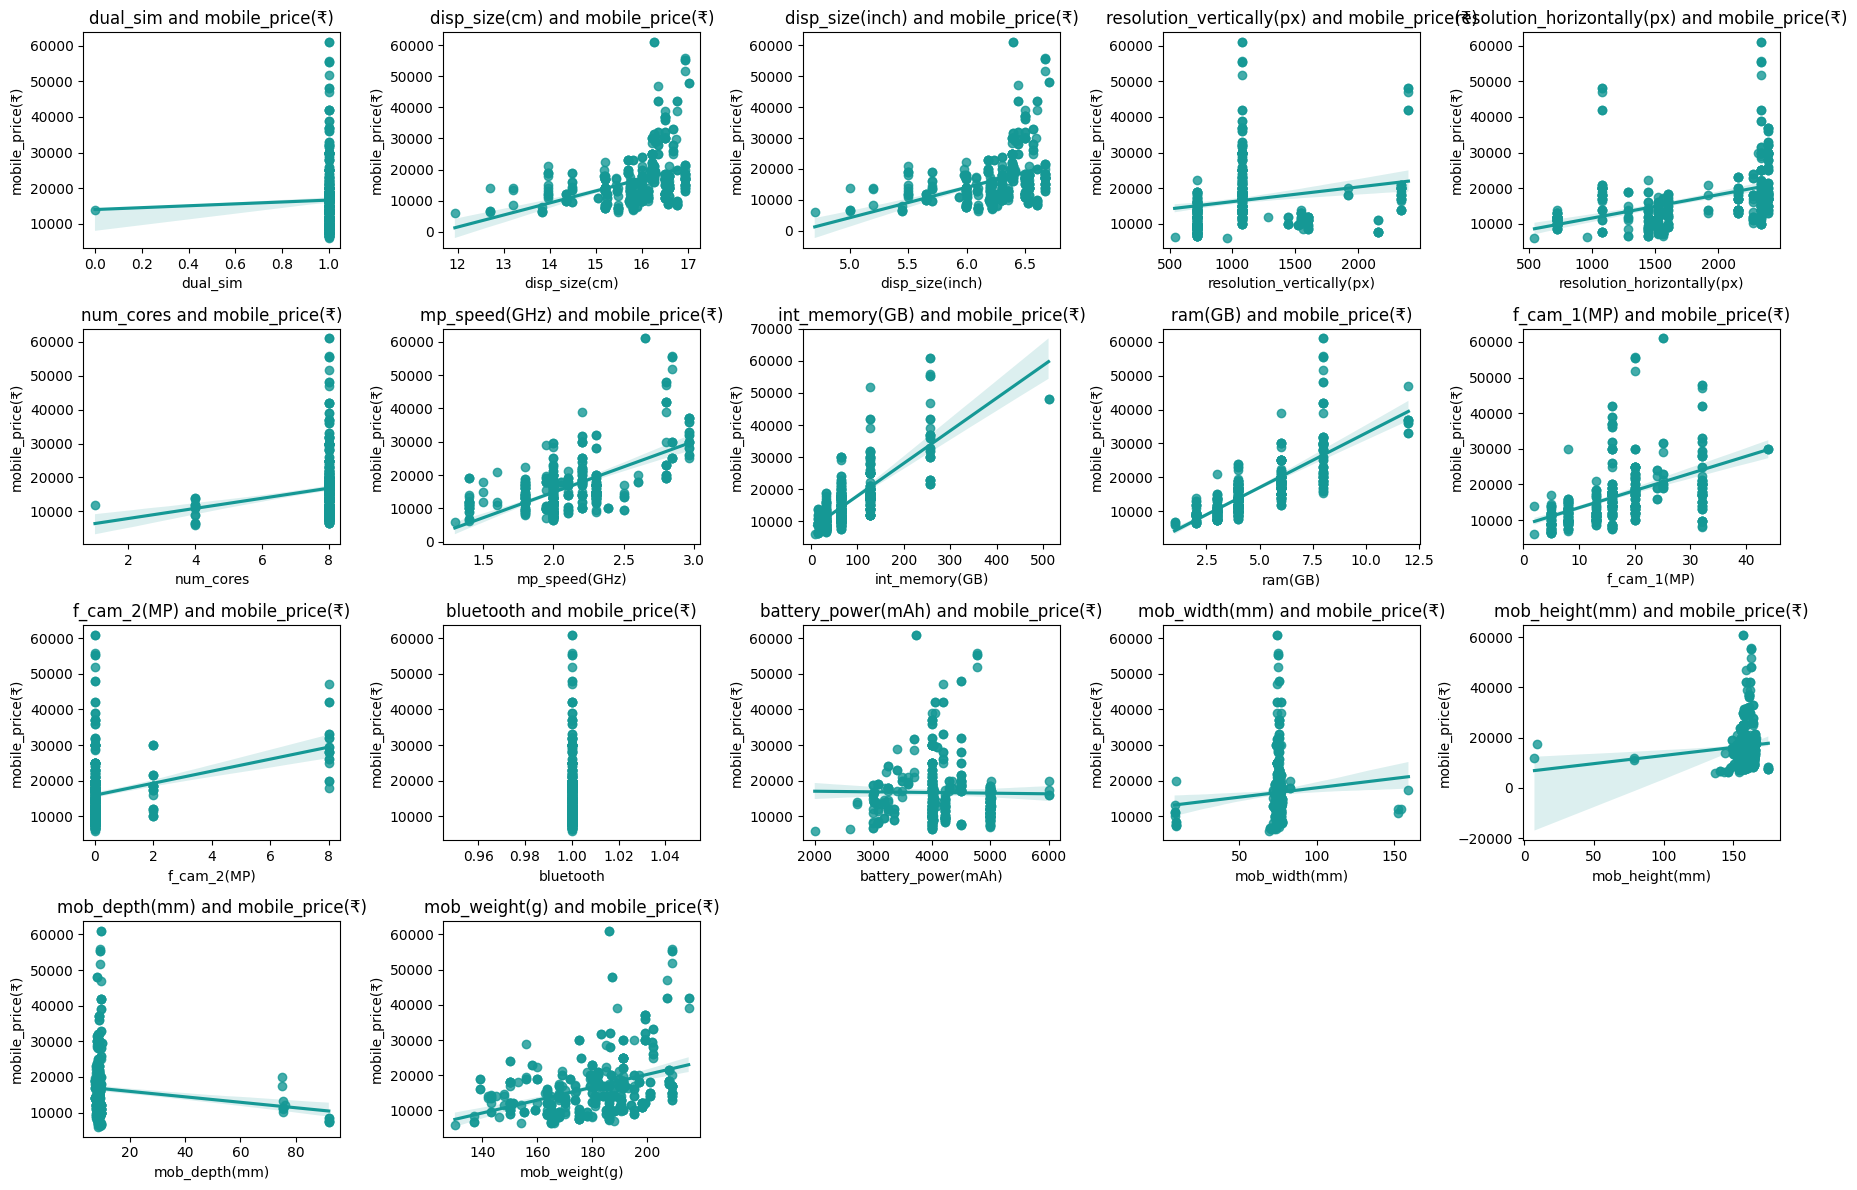

In [23]:
nrows = 4
ncols = (len(df.columns[3:20]) + nrows - 1) // nrows

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))

axes = axes.flatten()

for i, col in enumerate(df.columns[3:20]):
    sns.regplot(x=col, y="mobile_price(₹)", data=df, ax=axes[i], color='#159895')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('mobile_price(₹)')
    axes[i].set_title(f"{col} and mobile_price(₹)")

for j in range(i+1, nrows*ncols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Model Creation 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [30]:
X = df.drop(columns=["mobile_name", "mobile_price(₹)", "mobile_color"])
y = df[['mobile_price(₹)']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((344, 86), (115, 86), (344, 1), (115, 1))

In [35]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = mlr.predict(X_test)
r2_score(y_test, y_pred)

0.9211690503885752